<b><center> Homework 8 </center></b>
<br>
<b><center> James Bonifield </center></b>
<br>
<br>
<b>Question 11.1</b><br>
Using	the	crime	data	set	from	Questions	8.2,	9.1,	and	10.1,	build	a	regression	model	using:
1. Stepwise	regression
2. Lasso
3. Elastic	net
For	Parts	2	and	3,	remember	to	scale	the	data	first	– otherwise,	the	regression	coefficients	will	be	on	
different	scales	and	the	constraint	won’t	have the desired effect.
For	Parts	2	and	3,	use	the	glmnet function	in	R.	

First, load a few library and the data, then take a look at variables

In [125]:
library('tidyverse')
library('ggplot2')
library('caret')
library('glmnet')
library('pROC')
data <- suppressMessages((read_tsv('uscrime.txt')))
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635

We can see that all the data is numeric except column 2 (So), so we can start by scaling all that factor data

In [126]:
ScaledData <- as.tibble(scale(data[,-c(2,16)]))
ScaledData <- cbind(data[,2],ScaledData,data[,16])
str(ScaledData)

'data.frame':	47 obs. of  16 variables:
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ M     : atomic  0.989 0.352 0.273 -0.205 0.193 ...
  ..- attr(*, "scaled:center")= Named num  13.857 10.564 8.5 8.023 0.561 ...
  .. ..- attr(*, "names")= chr  "M" "Ed" "Po1" "Po2" ...
  ..- attr(*, "scaled:scale")= Named num  1.2568 1.1187 2.9719 2.7961 0.0404 ...
  .. ..- attr(*, "names")= chr  "M" "Ed" "Po1" "Po2" ...
 $ Ed    : atomic  -1.309 0.658 -1.487 1.373 1.373 ...
  ..- attr(*, "scaled:center")= Named num  13.857 10.564 8.5 8.023 0.561 ...
  .. ..- attr(*, "names")= chr  "M" "Ed" "Po1" "Po2" ...
  ..- attr(*, "scaled:scale")= Named num  1.2568 1.1187 2.9719 2.7961 0.0404 ...
  .. ..- attr(*, "names")= chr  "M" "Ed" "Po1" "Po2" ...
 $ Po1   : atomic  -0.909 0.606 -1.346 2.154 0.808 ...
  ..- attr(*, "scaled:center")= Named num  13.857 10.564 8.5 8.023 0.561 ...
  .. ..- attr(*, "names")= chr  "M" "Ed" "Po1" "Po2" ...
  ..- attr(*, "scaled:scale")= Named num  1.2568 1.1187 2.9719 2.7961 0.0404 .

<b>1. Stepwise Regression </b> <br>
First, we'll perform 4 fold Cross-Validation on the scaled Crime Data. Note we do a forward selection model here, but we could just as easily do a backwards, since there are a relatively low number of variables one could make a case that it makes more sense.

In [127]:
ControlData1 <- trainControl(method = 'repeatedcv', number = 4, repeats = 4)
lmFit_AIC <- train(Crime ~., data = ScaledData, method='lmStepAIC', scope = list(lower = Crime~1, upper = Crime~.),
               direction = "forward", trControl=ControlData1)

Start:  AIC=386.97
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=380.83
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=384.19
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=387.58
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=393.64
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=392.81
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=361.23
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=396.78
.outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

Start:  AIC=404.05
.outc

In [128]:
#show final model
lmFit_AIC$finalModel


Call:
lm(formula = .outcome ~ So + M + Ed + Po1 + Po2 + LF + M.F + 
    Pop + NW + U1 + U2 + Wealth + Ineq + Prob + Time, data = dat)

Coefficients:
(Intercept)           So            M           Ed          Po1          Po2  
    906.380       -3.803      110.382      210.678      572.995     -305.958  
         LF          M.F          Pop           NW           U1           U2  
    -26.826       51.293      -27.906       43.234     -105.056      141.714  
     Wealth         Ineq         Prob         Time  
     92.792      281.954     -110.394      -24.655  


Simply copy the generated formula above and substitute .outcome and dat for Crime and ScaledData:

In [129]:
LinearModel <- lm(formula = Crime ~ So + M + Ed + Po1 + Po2 + LF + M.F + 
    Pop + NW + U1 + U2 + Wealth + Ineq + Prob + Time, data = ScaledData)
summary(LinearModel)


Call:
lm(formula = Crime ~ So + M + Ed + Po1 + Po2 + LF + M.F + Pop + 
    NW + U1 + U2 + Wealth + Ineq + Prob + Time, data = ScaledData)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  906.380     59.113  15.333 5.08e-16 ***
So            -3.803    148.755  -0.026  0.97977    
M            110.382     52.424   2.106  0.04344 *  
Ed           210.678     69.458   3.033  0.00486 ** 
Po1          572.995    315.347   1.817  0.07889 .  
Po2         -305.958    328.483  -0.931  0.35883    
LF           -26.826     59.394  -0.452  0.65465    
M.F           51.293     59.977   0.855  0.39900    
Pop          -27.906     49.095  -0.568  0.57385    
NW            43.234     66.642   0.649  0.52128    
U1          -105.056     75.906  -1.384  0.17624    
U2           141.714     69.536   2.038  0.05016 .  
Wealth        92.792    100.028   0.928  0.36075    
Ineq      

In [130]:
mse <- mean(LinearModel$residuals^2)
print('standard error is:')
mse

[1] "standard error is:"


[1] 28828.63

<b>2. LASSO Regression </b>

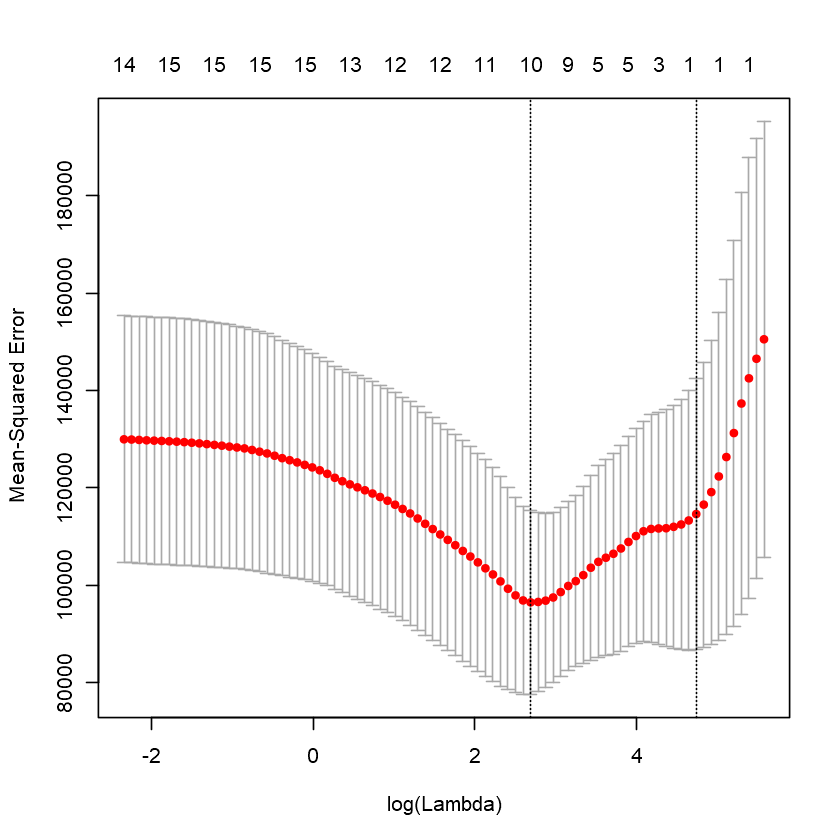

In [131]:
MatFactors <- as.matrix(ScaledData[-16])
MatResponse <- as.matrix(ScaledData$Crime)
LassoModel <- cv.glmnet(x=MatFactors, y=MatResponse, alpha=1, nfolds=4,type.measure='mse',family='gaussian')

plot(LassoModel)

So, the above picture provides a lot of information about our LASSO model - the left of the horizontal vertical lines corresponds ot the minimum Mean Squared Error, and the right line represents the largest value for lambda within 1 standard error of the left line. Below we see the minimum error:

In [132]:
print('Minimum Mean-Squared Error:')
LassoModel$cvm[which(LassoModel$lambda == LassoModel$lambda.min)]

[1] "Minimum Mean-Squared Error:"


[1] 96483.83

In [133]:
coef(LassoModel)

16 x 1 sparse Matrix of class "dgCMatrix"
                   1
(Intercept) 905.0851
So            .     
M             .     
Ed            .     
Po1         150.8208
Po2           .     
LF            .     
M.F           .     
Pop           .     
NW            .     
U1            .     
U2            .     
Wealth        .     
Ineq          .     
Prob          .     
Time          .     

We can see from the above coefficients that the LASSO Model only selects 9 of the 15 factors. Next, we'll investigate using an Elastic Net by tuning the value of alpha (i.e. introducing an element of a Ridge model, where alpha/lambda = 0)

<b>3. Elastic Net Model </b>

To find our elastic net model, we can loop through alpha values from 0.1 to 0.9 in increments of 0.05, the mind the 

In [135]:
a <- seq(0.1, 0.9, 0.05)
vCount = 0
datalist = list()
for (i in a) {
    vCount = vCount + 1
    cv <- cv.glmnet(MatFactors, MatResponse, family = 'gaussian', nfold = 4, type.measure = 'mse', alpha = i)
    #TestModel[''] = cv$cvm[cv$lambda == cv$lambda.1se], lambda.1se = cv$lambda.1se, alpha = i)
    #TestModel <- cv$cvm[cv$lambda == cv$lambda.1se], lambda.1se = cv$lambda.1se, alpha = i)
    datapoint <- data.frame(x=cv$lambda.1se, y=i)
    datalist[[vCount]] <- datapoint
    }
big_data = do.call(rbind, datalist)
big_data
#cvMin <- search[search$cvm == min(search$cvm), ]
#md3 <- glmnet(MatFactors, MatResponse, family = 'gaussian', nfold = 4, type.measure= 'mse',
 #             lambda = cvMin$lambda.1se, alpha = cvMin$alpha)
#coef(md3)

x,y
177.17240,0.10
74.17962,0.15
88.58620,0.20
123.84552,0.25
53.81097,0.30
97.08593,0.35
64.26171,0.40
82.87354,0.45
56.42171,0.50
26.74393,0.55


So, we can see from the above table that the ideal $\alpha$ value to select is 0.75 for our Elastic Model

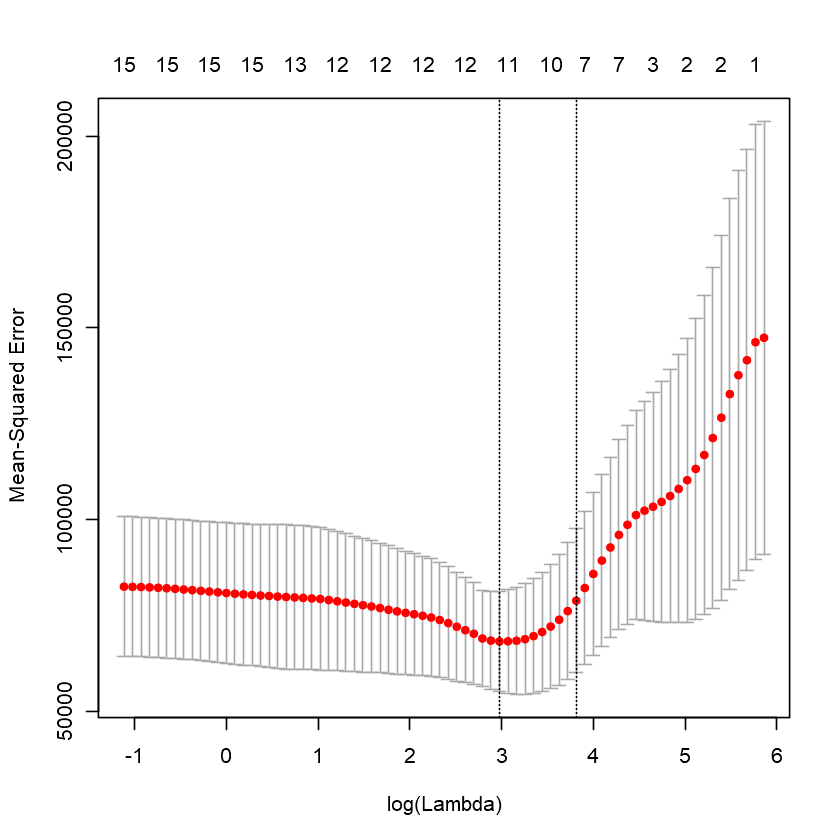

In [138]:
ElasticModel <- cv.glmnet(MatFactors, MatResponse, family = 'gaussian', nfold = 4, type.measure = 'mse', alpha = 0.75)
plot(ElasticModel)

In [139]:
print('Minimum Mean-Squared Error:')
ElasticModel$cvm[which(ElasticModel$lambda == ElasticModel$lambda.min)]
print('')
coef(ElasticModel)

[1] "Minimum Mean-Squared Error:"


[1] 68150.32

[1] ""


16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 905.085106
So            .       
M            36.972578
Ed            .       
Po1         216.434668
Po2          43.279302
LF            .       
M.F          49.939212
Pop           .       
NW            7.551339
U1            .       
U2            .       
Wealth        .       
Ineq         61.655085
Prob        -49.337125
Time          .       

So, we can see our Elastic Model produces a significantly better fit by fitting only 7 variables, instead of 9 from the LASSO Model.

<b>Conclusion:</b> <br>
Comparing the MSE across all three models, we can see that the simple stepwise analysis produced the model with the least error compared to the best of the more complex models, the Elastic Net model with an $\alpha=0.75$. Although the error is much lower, it is possible this is simply due to remaining overfitting in the model and the Elastic Model found truly models the data most correctly, though since there is relatively few data points really all these models are kind of garbage.